# Lab 5/ Spotify data set😜😜😜😜

Minakov Nikita, csse 1707DA

@minakov.nv

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import pandas as pd
import nsfg
import first
import thinkstats2
import thinkplot

import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from scipy import stats

## Exponential distribution


In [4]:
db_read

genre               artist_name  \
0       Movie            Henri Salvador   
1       Movie         Martin & les fées   
2       Movie           Joseph Williams   
3       Movie            Henri Salvador   
4       Movie              Fabien Nataf   
5       Movie            Henri Salvador   
6       Movie         Martin & les fées   
7       Movie               Laura Mayne   
8       Movie                    Chorus   
9       Movie       Le Club des Juniors   
10      Movie         Leopold Stokowski   
11      Movie              Randy Newman   
12      Movie      Idoles De La Musique   
13      Movie                    Chorus   
14      Movie        Richard M. Sherman   
15      Movie               Michel Roux   
16      Movie        Jean Claude Corbel   
17      Movie             Bernard Minet   
18      Movie            Henri Salvador   
19      Movie                    Amalya   
20      Movie         Martin & les fées   
21      Movie                  Dorothée   
22      Movie            Henri Salvador   
23      Movie        Jean Claude Corbel   
24      Movie            Henri Salvador   
25      Movie                 Jean Piat   
26      Movie            Henri Salvador   
27      Movie              Lucie Dolene   
28      Movie            Henri Salvador   
29      Movie                    Chorus   
...       ...                       ...   
232695   Soul             Amy Winehouse   
232696   Soul                  Autograf   
232697   Soul                     BAYNK   
232698   Soul              Donell Jones   
232699   Soul        The Isley Brothers   
232700   Soul              Willie Hutch   
232701   Soul                       Kem   
232702   Soul                 B.B. King   
232703   Soul                  Ella Vos   
232704   Soul                Joss Stone   
232705   Soul               Irma Thomas   
232706   Soul               Iris Temple   
232707   Soul             Tamar Braxton   
232708   Soul             Rexx Life Raj   
232709   Soul                Joss Stone   
232710   Soul                       SiR   
232711   Soul                The Knocks   
232712   Soul        Great Good Fine Ok   
232713   Soul               Keith Sweat   
232714   Soul                    H-Town   
232715   Soul                Emily King   
232716   Soul               John Legend   
232717   Soul                     Belly   
232718   Soul              Muddy Waters   
232719   Soul        Bobby "Blue" Bland   
232720   Soul                     Slave   
232721   Soul  Jr Thomas & The Volcanos   
232722   Soul              Muddy Waters   
232723   Soul                   R.LUM.R   
232724   Soul            Mint Condition   

                                               track_name  \
0                             C'est beau de faire un Show   
1                        Perdu d'avance (par Gad Elmaleh)   
2                          Don't Let Me Be Lonely Tonight   
3                          Dis-moi Monsieur Gordon Cooper   
4                                               Ouverture   
5                          Le petit souper aux chandelles   
6       Premières recherches (par Paul Ventimila, Lori...   
7                                           Let Me Let Go   
8                                                   Helka   
9                               Les bisous des bisounours   
10      Symphony No.4 In E Minor Op.98 : IV. Allegro E...   
11      The Hanging (Maverick - Original Motion Pictur...   
12                                 J'ai demandé à la lune   
13                                          Mangala Aarti   
14                                           Keys of Love   
15           Les aventures d'Arsène Lupin: 813 - Partie 6   
16                                                  Diane   
17                                           Ultra Man 80   
18                                                Veunise   
19                                   Ladies And Gentlemen   
20      Tout est possible (par Anggun, Dany Brillant, ...   

Here's the distribution of interarrival points from a dataset of popularity.

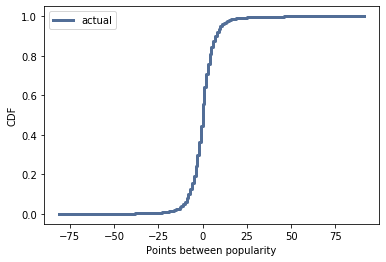

In [5]:
db_read = pd.read_csv('SpotifyFeatures.csv', delimiter = ',')
diff = db_read['popularity'].diff()
diff

cdf = thinkstats2.Cdf(diff, label='actual')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Points between popularity', ylabel='CDF')

Here's what the CCDF looks like on a log-y scale.  A straight line is consistent with an exponential distribution.

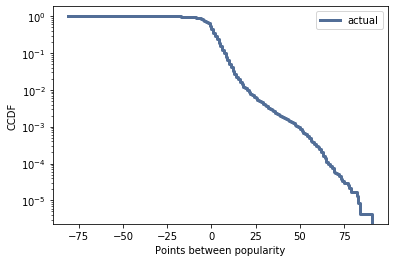

In [13]:
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel='Points between popularity',ylabel='CCDF', yscale='log', loc='upper right')

## Normal distribution


I'll use a normal model to fit the distribution of popularity.

In [16]:
popul = db_read['popularity'].dropna()

Here's the observed CDF and the model.  The model fits the data well except in the left tail.

Mean, Var 41.13930749634982 303.8842374621318
Sigma 17.43227573961965


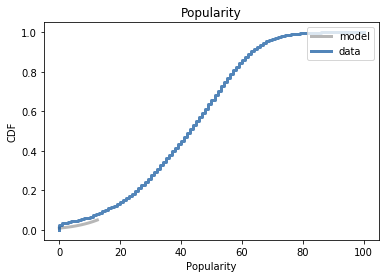

In [23]:
mu, var = thinkstats2.TrimmedMeanVar(popul, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(popul, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Popularity',
                 xlabel='Popularity',
                 ylabel='CDF')

Here's the normal probability plot for popularity, showing that popular songs are not as popupular as was expected.

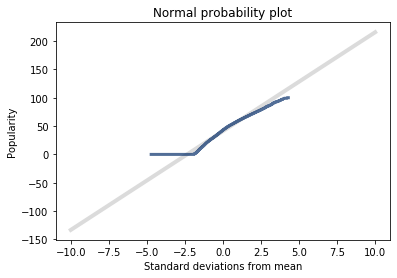

In [27]:
mean, var = thinkstats2.TrimmedMeanVar(popul, p=0.01)
std = np.sqrt(var)

xs = [-10, 10]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(popul)
thinkplot.Plot(xs, ys)

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Popularity')

In [28]:
popul_50 = db_read[db_read.popularity >= 50]
popul_50 = popul_50.popularity.dropna()

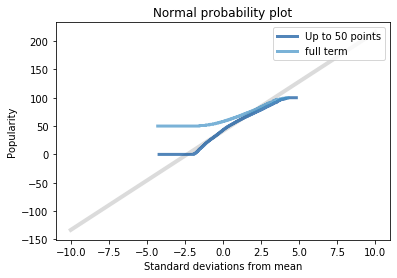

In [30]:
mean, var = thinkstats2.TrimmedMeanVar(popul, p=0.01)
std = np.sqrt(var)

xs = [-10, 10]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

thinkplot.PrePlot(2) 
xs, ys = thinkstats2.NormalProbability(popul)
thinkplot.Plot(xs, ys, label='Up to 50 points')

xs, ys = thinkstats2.NormalProbability(popul_50)
thinkplot.Plot(xs, ys, label='full term')
thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Popularity')

The plot shows difference bwtween distribusion of all songs and songs more popular then 50

## Lognormal model

The following function estimates the parameters of a normal distribution and plots the data and a normal model.

In [36]:
def MakeNormalModel(weights):
    """Plots a CDF with a Normal model.

    weights: sequence
    """
    cdf = thinkstats2.Cdf(popul, label='points')

    mean, var = thinkstats2.TrimmedMeanVar(popul)
    std = np.sqrt(var)
    print('n, mean, std', len(popul), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

Here's the distribution of popularity and a normal model, which is not a very good fit.

n, mean, std 232725 41.13930749634982 17.43227573961965


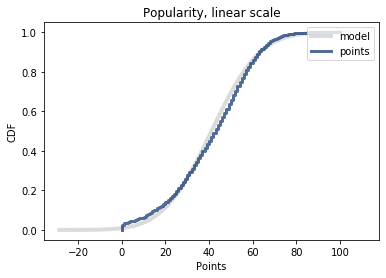

In [37]:
MakeNormalModel(popul)
thinkplot.Config(title='Popularity, linear scale', xlabel='Points',
                 ylabel='CDF', loc='upper right')

Here's the distribution of popularity and a lognormal model, plotted on a log-x scale.  The model is a better fit for the data, although the popular songs are more popular than the model expects.

C:\Users\asus.VENIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


n, mean, std 232725 41.13930749634982 17.43227573961965


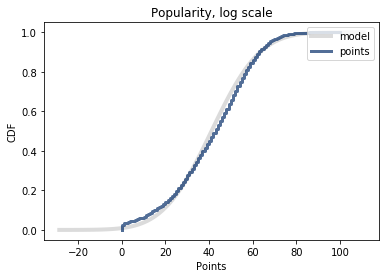

In [38]:
log_popul = np.log10(popul)
MakeNormalModel(log_popul)
thinkplot.Config(title='Popularity, log scale', xlabel='Points',
                 ylabel='CDF', loc='upper right')

The following function generates a normal probability plot.

In [43]:
def MakeNormalPlot(weights):
    """Generates a normal probability plot of birth weights.

    weights: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(popul, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(popul)
    thinkplot.Plot(xs, ys, label='points')

When we generate a normal probability plot with popularity, we can see clearly that the data deviate from the model systematically.

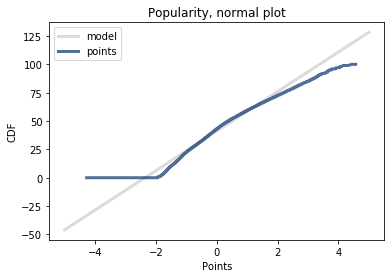

In [44]:
MakeNormalPlot(popul)
thinkplot.Config(title='Popularity, normal plot', xlabel='Points',
                 ylabel='CDF', loc='upper left')

I'll make a normal probability plot with log popularity

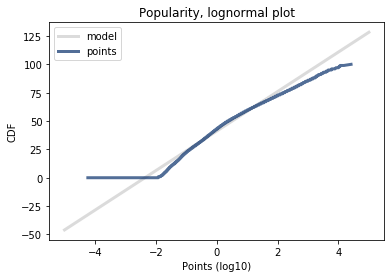

In [45]:
MakeNormalPlot(log_popul)
thinkplot.Config(title='Popularity, lognormal plot', xlabel='Points (log10)',
                 ylabel='CDF', loc='upper left')

## Pareto distribution


In [47]:
print('Number of popular songs: ', len(popul))

Number of popular songs:  232725


Here's the distribution of popularity of songs along with a Pareto model.

C:\Users\asus.VENIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


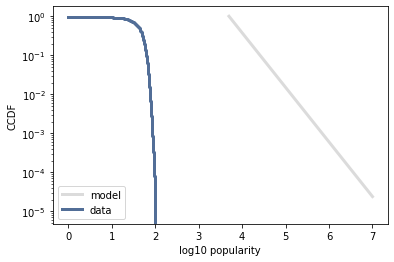

In [49]:
log_popul = np.log10(popul)
cdf = thinkstats2.Cdf(popul, label='data')
cdf_log = thinkstats2.Cdf(log_popul, label='data')

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=5000, alpha=1.4, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')

thinkplot.Cdf(cdf_log, complement=True) 
thinkplot.Config(xlabel='log10 popularity',
                 ylabel='CCDF',
                 yscale='log', loc='lower left')

The lognormal model might be a better fit for this data (as is often the case for things that are supposed to be Pareto).

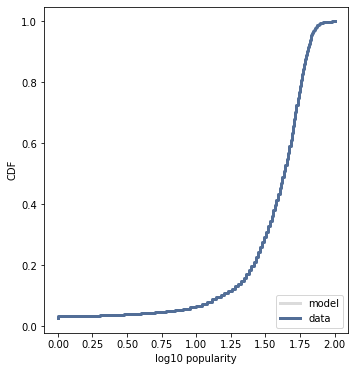

In [57]:
thinkplot.PrePlot(cols=2)

mu, sigma = log_popul.mean(), log_popul.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=10)
thinkplot.Plot(xs, ps, label='model', color='0.8')

thinkplot.Cdf(cdf_log) 
thinkplot.Config(xlabel='log10 popularity',
                 ylabel='CDF', loc='lower right')

Here's a normal probability plot for the log-popularity.  The model fits the data well except in the right tail, where are located songs with greater popularity.

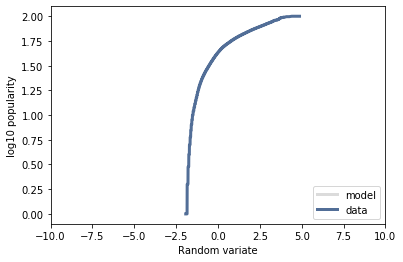

In [59]:
thinkstats2.NormalProbabilityPlot(log_popul, label='data')
thinkplot.Config(xlabel='Random variate',
                 ylabel='log10 popularity',
                 xlim=[-10, 10])

## Exercises


Plot the distribution of the random values and compare it to the actual distribution.

In [63]:
cdf = thinkstats2.Cdf(popul, label='actual')

n = len(popul)
lam = 44.0 / 24 / 60
sample = [random.expovariate(lam) for _ in range(n)]

1/lam, np.mean(sample)

(32.72727272727273, 32.68611673993508)

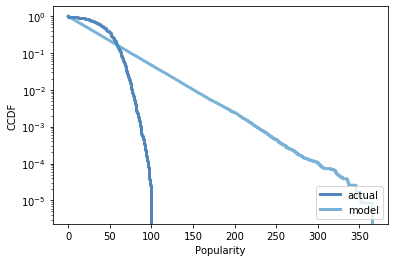

In [64]:
model = thinkstats2.Cdf(sample, label='model')
    
thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf, model], complement=True)
thinkplot.Config(xlabel='Popularity',
                ylabel='CCDF',
                yscale='log')

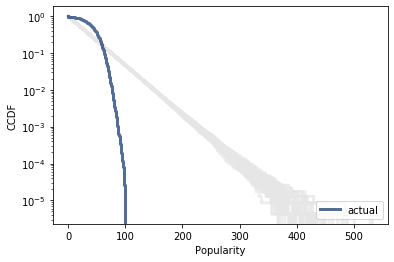

In [66]:
# Solution goes here
for i in range(50):
    sample = [random.expovariate(lam) for _ in range(n)]
    thinkplot.Cdf(thinkstats2.Cdf(sample), complement=True, color='0.9')
    
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel='Popularity',
                ylabel='CCDF',
                yscale='log')

<h2>Here is little analyse for my data set</h2>
<h5>PMF comparing T. Swift and Ed Sheaden:</h5>

In [2]:
SpotiDB = pd.read_csv('SpotifyFeatures.csv', delimiter = ',')
SpotiDB.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [3]:
popDB = SpotiDB[SpotiDB.genre == 'Pop']
jazzDB = SpotiDB[SpotiDB.genre == 'Jazz']

Most popular POP singers:

In [4]:
popDB.artist_name.value_counts().head(15)

Drake                  154
BTS                     76
Kanye West              72
Taylor Swift            67
Future                  66
Ariana Grande           62
J. Cole                 61
Panic! At The Disco     59
The Weeknd              56
Logic                   53
Travis Scott            52
One Direction           52
Shawn Mendes            50
Mac Miller              47
Ed Sheeran              47
Name: artist_name, dtype: int64

EdSheeran is one of my favorite singers, T. Swift is very popular, that is why i dtcided to compare them.

In [5]:
TSwift = popDB[popDB.artist_name == 'Taylor Swift']
EdSheeran =  popDB[popDB.artist_name == 'Ed Sheeran']

Text(0, 0.5, 'Density')

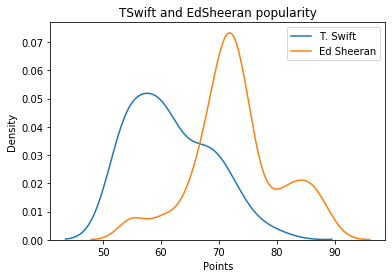

In [6]:
sns.distplot(TSwift.popularity, hist=False, label="T. Swift")
sns.distplot(EdSheeran.popularity,hist=False, label="Ed Sheeran")

plt.legend()
plt.title('TSwift and EdSheeran popularity')
plt.xlabel('Points')
plt.ylabel('Density')

We got two completely different graphics. We can see that Edda's peak of popularity is in area 73 with a sharper slope on the left and a bell shape. While Swift has a lesser maximum of popularity shifted to 55 and has a smoother and longer slope on the right side.

Text(0, 0.5, 'Density')

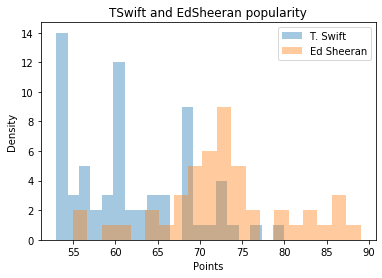

In [7]:
sns.distplot(TSwift.popularity, kde=False, bins=20, label="T. Swift")
sns.distplot(EdSheeran.popularity, kde=False, bins=20, label="Ed Sheeran")

plt.legend()
plt.title('TSwift and EdSheeran popularity')
plt.xlabel('Points')
plt.ylabel('Density')

After applying bins, the graphic changed its appearance. now we see a great advantage at Swift in the region of 50, because she has a greater number of songs with such popularity, and Edd has a peak located in area 73 with a much lower density.

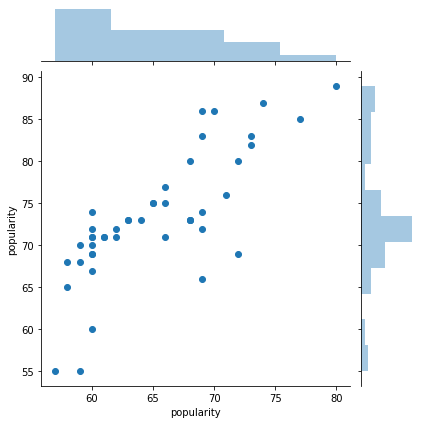

In [8]:
sns.jointplot(TSwift.popularity[0:45],EdSheeran.popularity[0:45])

Correlation analysis gives a slight shift towards Swift but retains the shape of a straight line.

<h5>CDF comparing T. Swift and Ed Sheaden:</h5>


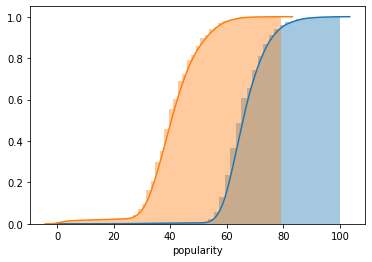

In [9]:
sns.distplot(popDB.popularity,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

sns.distplot(jazzDB.popularity,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

SDF anadysis shows the same trend. Achievement 0.8 for Swift occurs in the region of popularity 49, while for Edd it is reached already in the region of 77. And also the chapel is clearly visible, achievements 1 for both singers.

<h5>As can be seen from the analysis, my favorite singer turned out to be more popular than Taylor Swift, and his songs are gaining a much higher rating on popular music resources. Apparently this is no coincidence! :)</h5>

<h5>The same analysis for popular Jazz singers</h5>
<h5>PMF compairing Miles Davis and Bonobo</h5>

In [10]:
jazzDB.artist_name.value_counts().head(15)

Miles Davis             93
Thievery Corporation    90
Dean Martin             80
Kenny G                 73
Bonobo                  73
Ella Fitzgerald         72
Nat King Cole           71
Norah Jones             69
A Tribe Called Quest    68
Nujabes                 67
Emancipator             67
Nina Simone             64
Billie Holiday          63
Louis Armstrong         62
Tony Bennett            57
Name: artist_name, dtype: int64

In [11]:
MDavis = jazzDB[jazzDB.artist_name == 'Miles Davis']
Bonobo =  jazzDB[jazzDB.artist_name == 'Bonobo']

Text(0, 0.5, 'Density')

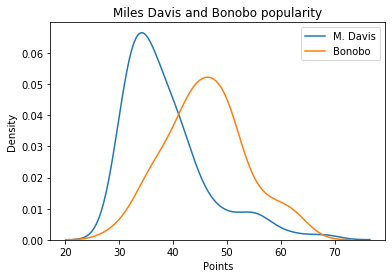

In [12]:
sns.distplot(MDavis.popularity, hist=False, label='M. Davis')
sns.distplot(Bonobo.popularity, hist=False, label='Bonobo ')

plt.legend()
plt.title('Miles Davis and Bonobo popularity')
plt.xlabel('Points')
plt.ylabel('Density')

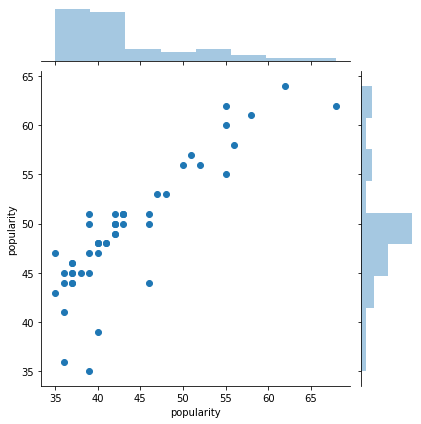

In [13]:
sns.jointplot(MDavis.popularity[0:50],Bonobo.popularity[0:50])

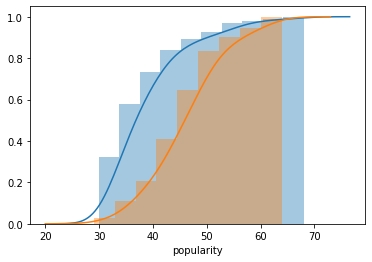

In [14]:
sns.distplot(MDavis.popularity,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

sns.distplot(Bonobo.popularity,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

 While compairing Miles Davis and Bonobo we can see +- same stats with respect to Jazz singers.

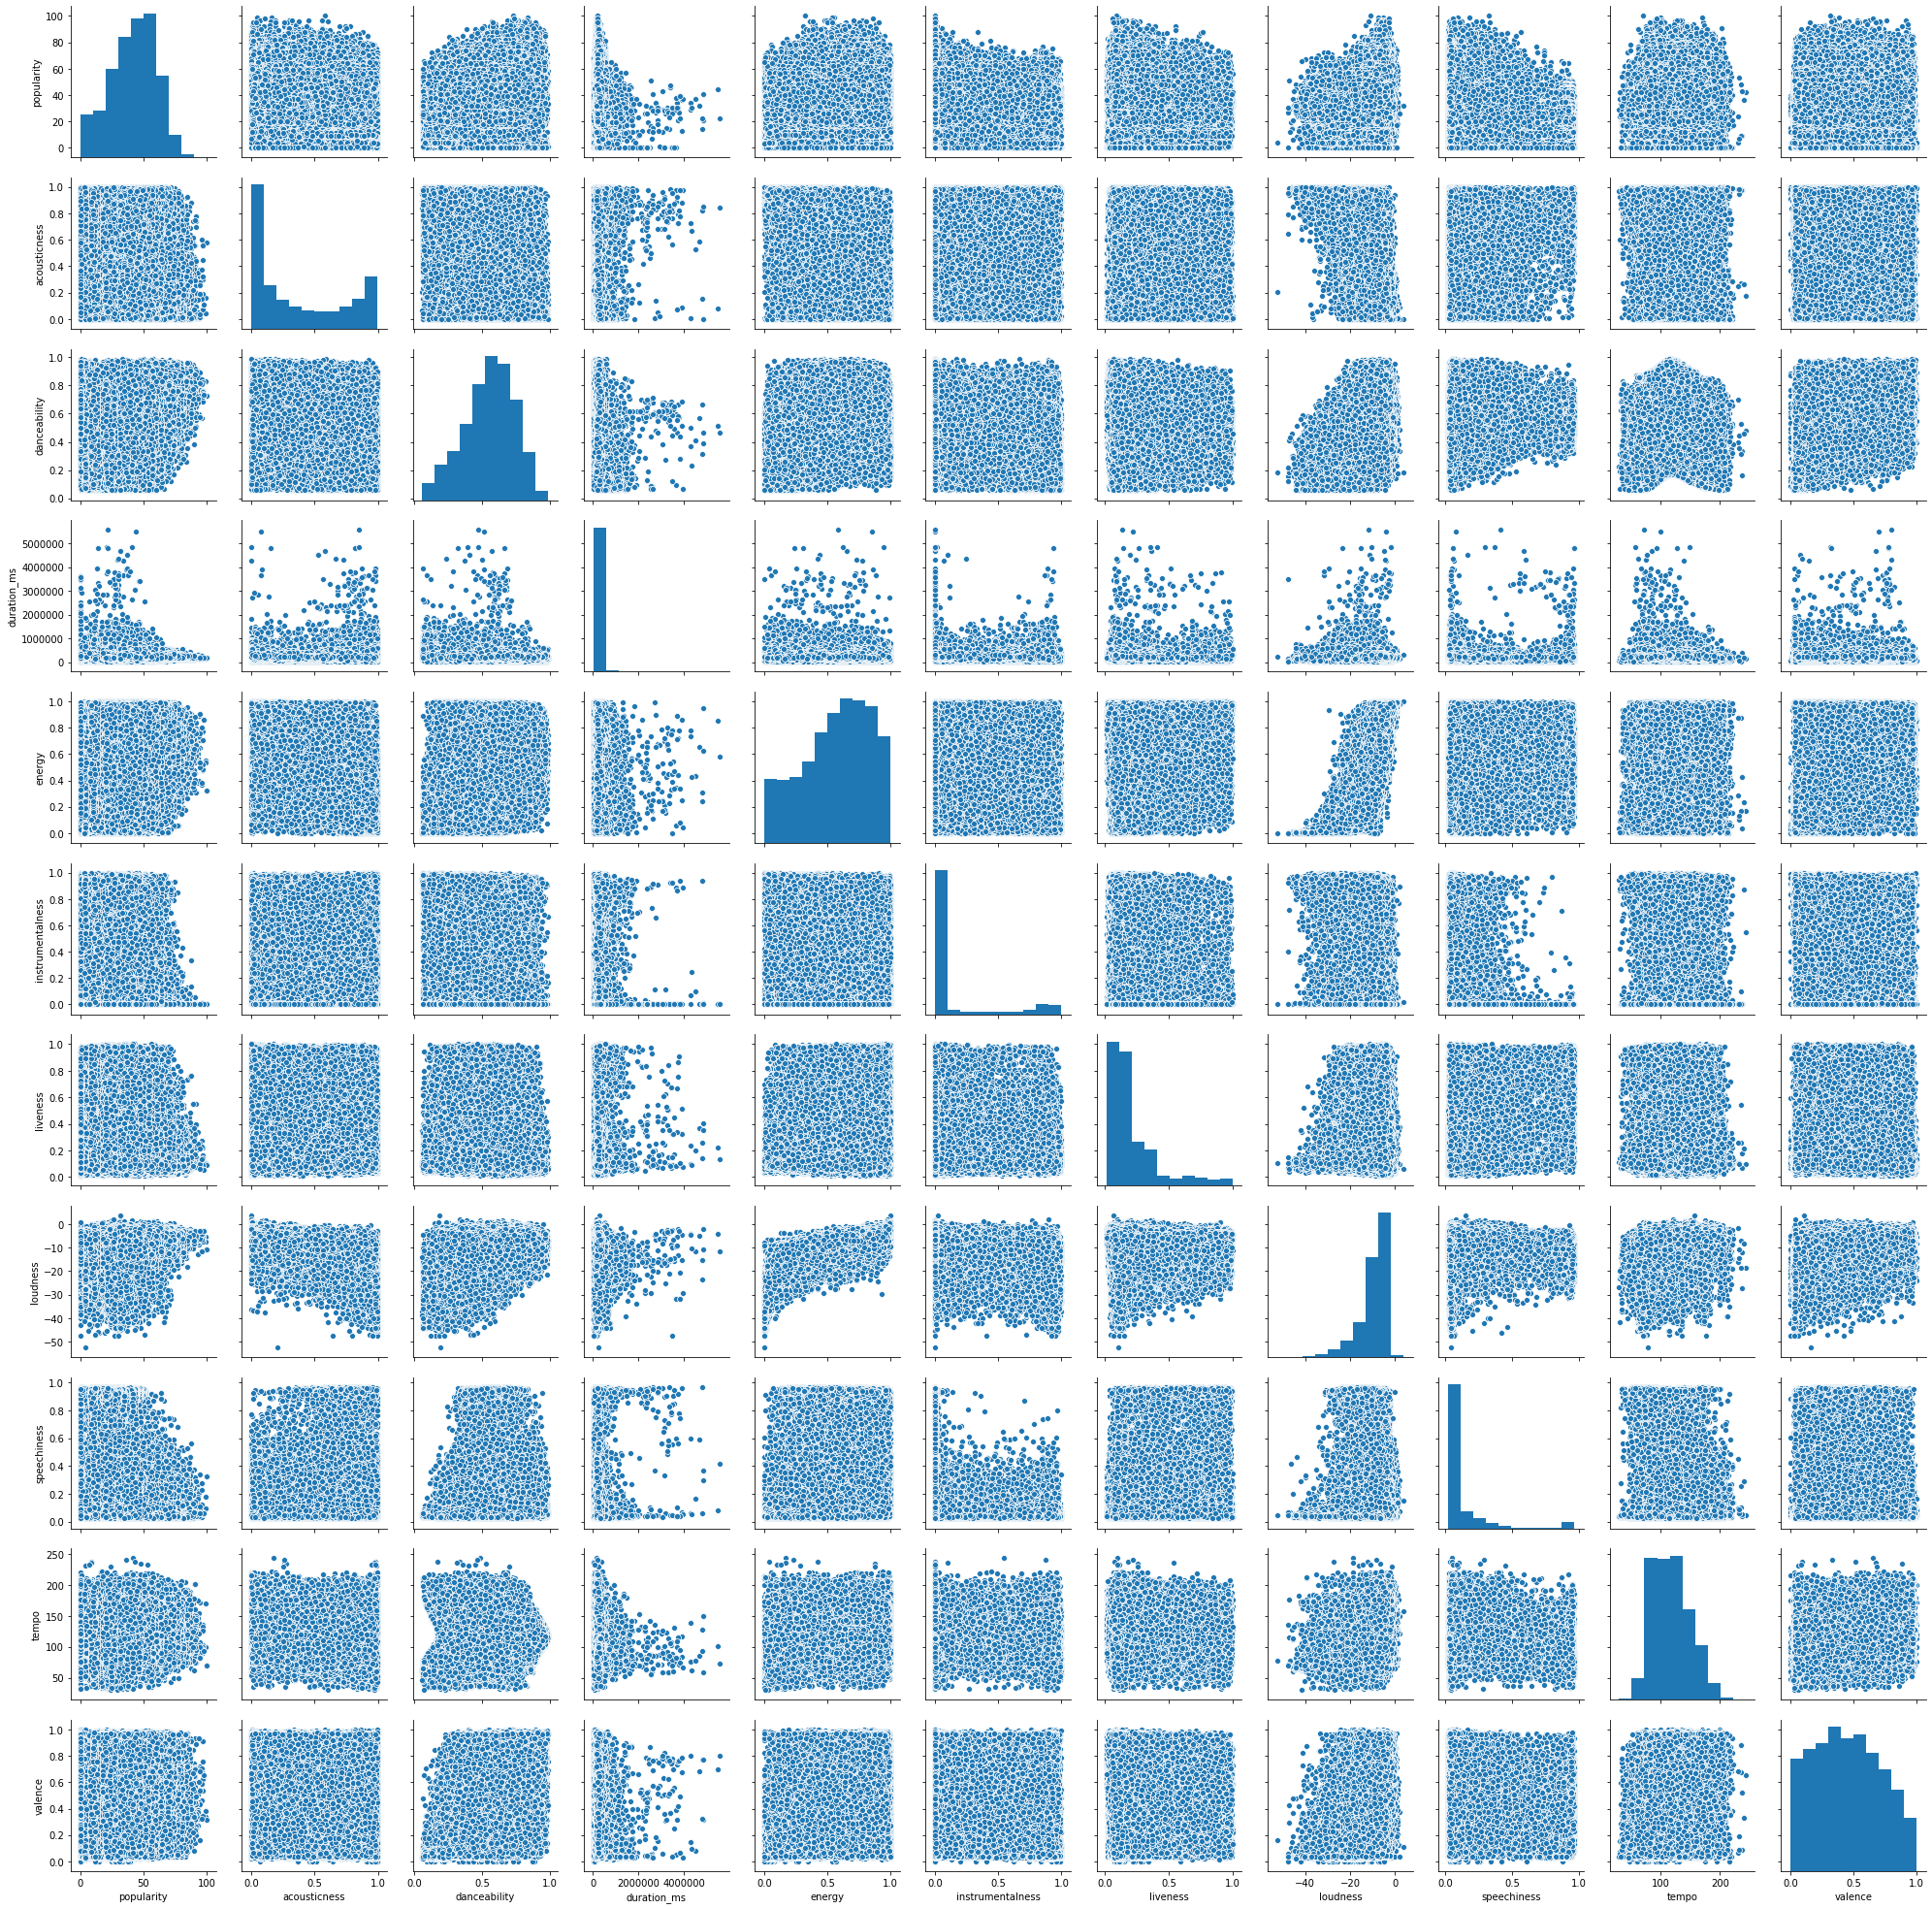

In [15]:
sns.pairplot(SpotiDB)

Corelation hists for all data in dataset.